In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from scipy.linalg import toeplitz

In [7]:
def matrix_construct(dimension, rank):
    return np.random.randn(dimension, rank) @ np.random.randn(rank, dimension)

In [8]:
matrix = matrix_construct(10, 5)
print(np.linalg.matrix_rank(matrix))

5


In [9]:
matrix_size = 20 # matrix size (square)
ranks_range = range(2, 16)
ranks = np.zeros((len(ranks_range), len(ranks_range), 2))

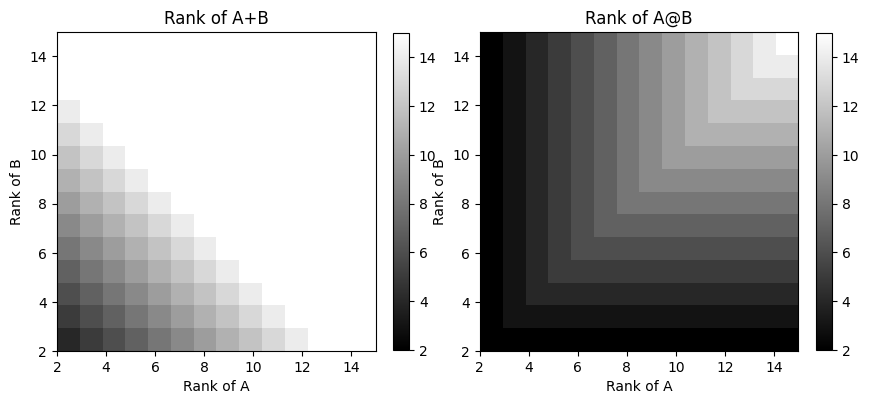

In [10]:
for i in range(len(ranks_range)):
  for j in range(len(ranks_range)):

    S = matrix_construct(matrix_size, ranks_range[i]) + matrix_construct(matrix_size, ranks_range[j])
    M = matrix_construct(matrix_size, ranks_range[i]) @ matrix_construct(matrix_size, ranks_range[j])
    
    ranks[i,j,0] = np.linalg.matrix_rank(S)
    ranks[i,j,1] = np.linalg.matrix_rank(M)



## visualization
fig, axs = plt.subplots(1, 2, figsize=(10,6))
s = '+@' # symbols for title

for i in range(2):

  # draw heatmat
  h = axs[i].imshow(ranks[:,:,i],vmin=np.min(ranks_range),vmax=np.max(ranks_range), origin='lower',
                    extent=(ranks_range[0], ranks_range[-1], ranks_range[0], ranks_range[-1]), cmap='gray')
  
  # add colorbar and other niceties
  fig.colorbar(h, ax=axs[i], fraction=.045)
  axs[i].set_xlabel('Rank of A')
  axs[i].set_ylabel('Rank of B')
  axs[i].set_title(f'Rank of A{s[i]}B')